**Installing Libraries and Packages**

In [461]:
# Import Library
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import os
import zipfile

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Downloading files with kaggle**

In [462]:
if os.path.isfile('/content/kaggle.json') == True:
  print("Skipping download")
else:
  files.upload()
  !mkdir ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json
  !kaggle datasets download pavansubhasht/ibm-hr-analytics-attrition-dataset




Skipping download


**Unzipping Files and read the csv file**

In [463]:
path = os.getcwd()

if os.path.isfile(path + 'WA_Fn-UseC_-HR-Employee-Attrition.csv') == False:
  data = path + '/ibm-hr-analytics-attrition-dataset.zip'
  zip_ref = zipfile.ZipFile(data, 'r')
  zip_ref.extractall(path)
else:
  print("Skip extraction")

zip_ref.close()

os.listdir()
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [464]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Checking if there's attribute has 1 value or you can say **missing value**

In [465]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Uncomment if there's missing value (if there's value from the above is 1)

In [466]:
# def meanOfCol(df, col):
#     sum=0

#     temp_df = df.loc[:,col]
#     temp_df = temp_df.fillna(0)

#     return temp_df.mean()

# def missingVal(df):
#     for col in df:
#         if df[col].isna().sum() > 0:
#             df[col] = df[col].fillna(meanOfCol(df, col))

# missingVal(data)
# data.isna().sum()

In [467]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**Data Cleaning** (You can drop attribute you don't want)

In [468]:
to_drop = ['Department', 'EducationField', 'Over18', 'EmployeeCount', 'MaritalStatus', 'JobRole', 'Gender', 'BusinessTravel']
data.drop(to_drop, inplace=True, axis=1)

**Data Transform** (Making object type from zero to 1 only)

In [469]:
# data = pd.get_dummies(data, prefix=['Attrition', 'PerformanceRating'])
# data = data.drop(["PerformanceRating_No"], axis=1)
# data = data.rename(columns={"PerformanceRating_Yes": "PerformanceRating_New"})
# data

# to_drop = ['PerformanceRating']
# data.drop(to_drop, inplace=True, axis=1)

In [470]:
data = pd.get_dummies(data, prefix=['Attrition', 'OverTime'])
data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,6,4,0,5,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,3,3,10,7,1,7,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,3,3,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,8,7,3,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,3,3,2,2,2,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,5,2,0,3,1,0,1,0
1466,39,613,6,1,2062,4,42,2,3,1,...,5,3,7,7,1,7,1,0,1,0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,3,6,2,0,3,1,0,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,2,9,6,0,8,1,0,1,0


**Determining Output Variable/s** (Predicting Performance Rating)

In [471]:
pr = "OverTime_Yes"
x = data.iloc[:, data.columns != pr]
y = data[["OverTime_Yes"]]
y

,OverTime_Yes
0,1
1,0
2,1
3,1
4,0
...,...
1465,0
1466,0
1467,1
1468,0


**Data Standardization**

In [472]:
def sameValue(df, col):
    same = False
    first_val = df[col].iloc[0]
    for i in range(len(df.index)):
        if first_val == df[col].iloc[i]:
            same = True
        else:
            same = False
            break
    return same

for col in data:
  if len(col) < 8:
    print('{}\t\t{}'.format(col, sameValue(data, col)))
  else:
    print('{}\t{}'.format(col, sameValue(data, col)))

Age		False
DailyRate	False
DistanceFromHome	False
Education	False
EmployeeNumber	False
EnvironmentSatisfaction	False
HourlyRate	False
JobInvolvement	False
JobLevel	False
JobSatisfaction	False
MonthlyIncome	False
MonthlyRate	False
NumCompaniesWorked	False
PercentSalaryHike	False
PerformanceRating	False
RelationshipSatisfaction	False
StandardHours	True
StockOptionLevel	False
TotalWorkingYears	False
TrainingTimesLastYear	False
WorkLifeBalance	False
YearsAtCompany	False
YearsInCurrentRole	False
YearsSinceLastPromotion	False
YearsWithCurrManager	False
Attrition_No	False
Attrition_Yes	False
OverTime_No	False
OverTime_Yes	False


2nd **Data Transforming**

In [473]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# normalizer = LogisticRegression()
# y_scaled = normalizer.fit(y)
# x_scaled = x.astype('float32')
# y = LabelEncoder().fit_transform(y.astype('str'))
# y = LabelEncoder().fit_transform(y.ravel())

In [474]:
x_scaled

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -2.28090588,
         2.28090588, -1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  0.4384223 ,
        -0.4384223 ,  0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -2.28090588,
         2.28090588, -1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  0.4384223 ,
        -0.4384223 , -1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  0.4384223 ,
        -0.4384223 ,  0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ...,  0.4384223 ,
        -0.4384223 ,  0.62824112]])

In [475]:
y.values

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

**Creating variables for train and test data to split the data** (80% train and 20% test)

In [476]:
# Implementasi Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y.values.ravel(), test_size=0.2, random_state=42)

**Model** for the data

In [477]:
import tensorflow as tf

# Set random value to fixed number
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Model
def modelLR():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation="relu"), 
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["accuracy"])
  return model
model = modelLR()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
37/37 [==============================] - 1s 10ms/step - loss: 0.5568 - accuracy: 0.7066 - val_loss: 0.4258 - val_accuracy: 0.8333
Epoch 2/5
37/37 [==============================] - 0s 5ms/step - loss: 0.3631 - accuracy: 0.8699 - val_loss: 0.2676 - val_accuracy: 0.9456
Epoch 3/5
37/37 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9617 - val_loss: 0.1326 - val_accuracy: 0.9932
Epoch 4/5
37/37 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9957 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 5/5
37/37 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000


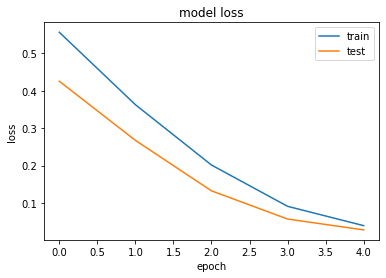

In [478]:
history.history.keys() 
['accuracy', 'loss', 'val_accuracy', 'val_loss'], plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

In [479]:
X_test

array([[-0.97717366,  0.15745841, -0.51733242, ...,  0.4384223 ,
        -0.4384223 ,  0.62824112],
       [ 1.76037262,  0.69790269,  0.46982144, ...,  0.4384223 ,
        -0.4384223 ,  0.62824112],
       [-1.41518107, -1.39445959,  1.58036953, ..., -2.28090588,
         2.28090588,  0.62824112],
       ...,
       [ 1.43186707,  1.28792902,  2.32073492, ...,  0.4384223 ,
        -0.4384223 , -1.59174553],
       [ 0.008343  ,  1.04745611,  0.09963874, ...,  0.4384223 ,
        -0.4384223 ,  0.62824112],
       [ 1.10336151, -1.37214767, -0.88751511, ...,  0.4384223 ,
        -0.4384223 , -1.59174553]])

In [480]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1], dtype=uint8)

**Predict with Logistic Regression**

conf_matrix: [[217   0]
 [  0  77]]
Classify:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        77

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

None


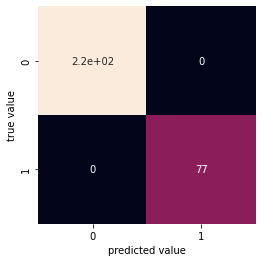

In [481]:
def Lr(X_train, X_test, y_train, y_test, validation_data=(X_test, y_test)):
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns


    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_model = logreg.predict(X_test)

    print("conf_matrix:", confusion_matrix(y_test, y_model))
    print("Classify:", classification_report(y_test, y_model))
 
    mat = confusion_matrix(y_test, y_model)
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')

result = Lr(X_train, X_test, y_train, y_test, validation_data=(X_test, y_test))
print(result)

In [482]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X_test, y_test = make_regression(n_samples=100, n_features=2, noise=0.1)
# fit final model
model = LinearRegression()
model.fit(X_test, y_test)
Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175], Predicted=-96.76182084650638
X=[-0.61175641  1.62434536], Predicted=118.8856107985114
X=[-2.3015387   0.86540763], Predicted=-26.869986994626927


**Predict with other Algorithm** (Working on it)

In [483]:
# for index in range(len(X_test)):
#   predicted = round(model.predict([X_test[index].tolist()],verbose = 0)[0][0])
#   actual = y_test[index][0]
#   if predicted != actual:
#     print(predicted, actual)

TypeError: ignored

In [ ]:
# for index in range(len(X_test)):
#   predicted = model.predict([X_test[index].tolist()], verbose = 0)
#   actual = y_test[index][0]
#   print(predicted[0][0], actual)